# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [104]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [105]:
# The SGD code I wrote in week 1's set, but with modifications to the loss/gradient function
# to account for regularization
def loss(X, Y, w):
    '''
    Calculate the error. The regularization term is not included in calculating the normal error.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
        lam: the value of lambda
    
    Outputs:
        l: The loss evaluated with respect to X, Y, w, and lambda
    '''
    loss = 0 
    for i in range(0, len(X)):
        loss += np.log((1 + np.exp(-Y[i] * np.dot(w, X[i]))))
    return loss / len(X)

def gradient(x, y, w, lam, N):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w for the regularized
    logistic loss function. 
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        lam: a float value for lambda
        N: the total number of points
        
    Output:
        g: The gradient of the loss with respect to x, y, and w. 
    '''
    reg_factor = 2 *  w * (lam / N) 
    gradient = x * y * np.exp(-y * np.dot(w, x)) / (1 + np.exp(-y * np.dot(w, x)))
    return gradient - reg_factor

    

def SGD(X, Y, w_start, eta, lam, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        lam: the regularization lambda
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        Ein: The training error using the final w
    '''
    
    losses = []
    W = []
    old_w = w_start
    for i in range(0, N_epochs):
        p = np.random.permutation(len(X))
        for j in range(0, len(X)):
            new_w = old_w + eta * gradient(X[p[j]], Y[p[j]], old_w, lam, len(X))
            old_w = new_w
    return new_w, loss(X, Y, new_w)

def random_w(length):
    w = []
    for i in range(0, length):
        w.append(np.random.ranf())
    return np.array(w)

# Adjust each of the N points to be normalized, 
def normalize(X):
    # First rearrange values such that we can find the mean/std deviation of each column
    rearranged_vals = []
    for j in range(0, len(X[0])):
        col = []
        for i in range(0, len(X)):
            col.append(X[i][j])
        rearranged_vals.append(col)
    
    # Now adjust values
    means = []
    stds = []
    
    for j in range(0, len(X[0])):
        means.append(np.mean(rearranged_vals[j]))
        stds.append(np.std(rearranged_vals[j]))
        
    for i in range(0, len(X)):
        for j in range(0, len(X[0])):
            X[i][j] = (X[i][j] - np.mean(rearranged_vals[j])) / np.std(rearranged_vals[j])
    return X, means, stds

def normalize_2(X, means, stds):
    for i in range(0, len(X)):
        for j in range(0, len(X[0])):
            X[i][j] = (X[i][j] - means[j]) / stds[j]
    return X

def add_bias(X):
    new_X = []
    for i in range(0, len(X)):
        new_X.append([])
        new_X[i].append(1)
        for j in range(0, len(X[0])):
            new_X[i].append(X[i][j])
    return np.array(new_X)

In [106]:
# Creation of the lambda array
lambdas = []
lam = .00001
for i in range(0, 15):
    lambdas.append(lam)
    lam *= 5
    

In [107]:
data1 = load_data('data/wine_training1.txt')
X1 = data1[:, 1:]
Y1 = data1[:, 0]

data2 = load_data('data/wine_training2.txt')
X2 = data2[:, 1:]
Y2 = data2[:, 0]

data_test = load_data('data/wine_testing.txt')
X_test = data_test[:, 1:]
Y_test = data_test[:, 0]

In [108]:
# Normalization of X arrays
X1, means1, stds1 = normalize(X1)
X1 = add_bias(X1)

X2, means2, stds2 = normalize(X2)
X2 = add_bias(X2)

X_test1 = normalize_2(X_test, means1, stds1)
X_test1 = add_bias(X_test1)

X_test2 = normalize_2(X_test, means2, stds2)
X_test2 = add_bias(X_test2)

In [109]:
Ein_1 = []
Ein_2 = []

Eout_1 = []
Eout_2 = []

l2_norm_1 = []
l2_norm_2 = []

for i in range(0, 15):
    print(i)
    start_w = random_w(14)
    W1, ein1 = SGD(X1, Y1, start_w, 5 * 10 ** -4, lambdas[i], 2000)
    W2, ein2 = SGD(X2, Y2, start_w, 5 * 10 ** -4, lambdas[i], 2000)
    eout1 = loss(X_test1, Y_test, W1)
    eout2 = loss(X_test2, Y_test, W2)
    Ein_1.append(ein1)
    Ein_2.append(ein2)
    
    Eout_1.append(eout1)
    Eout_2.append(eout2)
    
    l2_norm_1.append(np.linalg.norm(W1))
    l2_norm_2.append(np.linalg.norm(W2))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


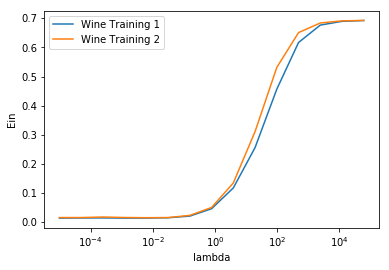

In [116]:
# Print wine training 1 ein
plt.figure()
plt.plot(lambdas, Ein_1)
plt.plot(lambdas, Ein_2)
plt.legend(["Wine Training 1", "Wine Training 2"])
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('Ein')
plt.show()

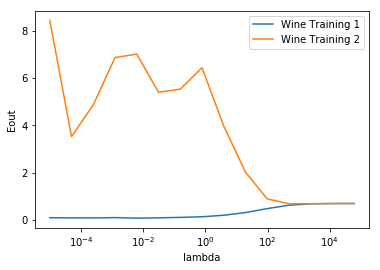

[0.088743869279021156, 0.082455305035645229, 0.080928713206903063, 0.093827045558350058, 0.072697689471179328, 0.084275906259794614, 0.10360440196172811, 0.13014649831740041, 0.19391637979850165, 0.30775180565902149, 0.4752164326081259, 0.6207668702799346, 0.67786195378663183, 0.68967996366921802, 0.69238666296801699]


In [117]:
# Print wine training 1 eout
plt.figure()
plt.plot(lambdas, Eout_1)
plt.plot(lambdas, Eout_2)
plt.legend(["Wine Training 1", "Wine Training 2"])
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('Eout')
plt.show()

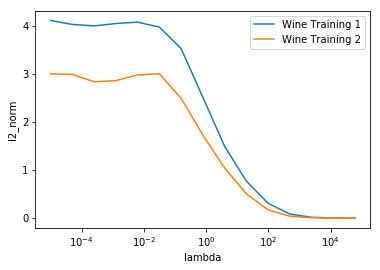

In [115]:
# Print wine training 1 eout
plt.figure()
plt.plot(lambdas, l2_norm_1)
plt.plot(lambdas, l2_norm_2)
plt.legend(["Wine Training 1", "Wine Training 2"])
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('l2_norm')
plt.show()